In [11]:
import seaborn as sns
import pandas as pd
df=sns.load_dataset("titanic")
print(df.head)

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

In [12]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [13]:
#print(df.isna().sum())

In [38]:
df['age'].fillna(df['age'].median())



,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


In [15]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [20]:
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
X = df.drop([ 'class', 'who', 'deck', 'embark_town', 'alive','survived'], axis=1, errors='ignore')
Y=df['survived']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
model_fit=model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))




Accuracy: 0.8212290502793296


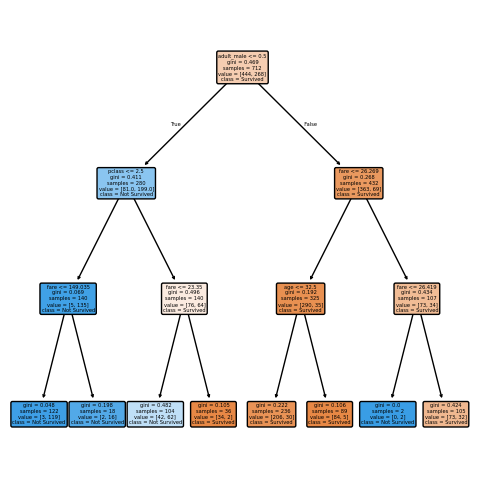

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(6,6))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Survived','Not Survived'],
    filled=True,
    rounded=True
)
plt.show()

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


reg_model = DecisionTreeRegressor(criterion='squared_error', max_depth=3, random_state=42)


reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 0.13347783710347377


RANDOM FOREST


In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42,
    criterion='gini'
)
r_forest=rf_model.fit(X_train,y_train)
r_predict=rf_model.predict(X_test)
accuracy=accuracy_score(y_test,r_predict)
print(accuracy)


0.7877094972067039
